In [1]:
#importing import library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as npatches
import numpy as np
pd.set_option("max_row",None)

In [2]:
#loading dataset
dataset=pd.read_csv("C:\\Users\\Rupesh\\Downloads\\time series analysis\\Stock-MArket-Forecasting-master\\AAPL.csv")

In [3]:
dataset.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
#selecting required feature
data=dataset[["close"]]

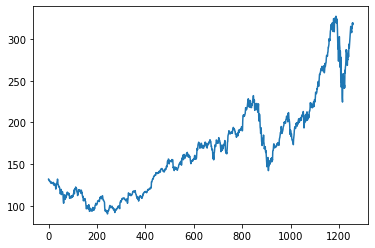

In [5]:
plt.plot(data)

In [6]:
#convering to array for model
data=data.to_numpy()

In [7]:
#function to create dependent and independent feature
def create_database(data,steps):
    data_X=[]
    data_y=[]
    for i in range(0,len(data)-steps-1):
        temp=data[i:(i+steps),0]
        data_X.append(temp)
        data_y.append(data[i+steps,0])
    return np.array(data_X),np.array(data_y)

In [8]:
#feature scaling and reshaping 2d array having one subarray
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

data=sc.fit_transform(data.reshape(-1,1))



In [9]:
time_stamp=100
X,y=create_database(data,time_stamp)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
X_test.shape

(232, 100)

In [12]:
X_train.shape

(925, 100)

In [13]:
#reshaping to 3d for lstm model
X_train=X_train.reshape(len(X_train),100,1)
X_test=X_test.reshape(len(X_test),100,1)

In [14]:
import keras

Using TensorFlow backend.


In [15]:
from keras.layers import Dense,LSTM
from keras.models import Sequential,load_model
from keras.losses import mse

In [18]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(100,1),return_sequences=True))
model.add(LSTM(units=100,activation="relu",return_sequences=True))
model.add(LSTM(units=100,activation="relu"))
model.add(Dense(units=1,activation="relu"))
model.compile(optimizer="adam",loss="mse",metrics=["accuracy"])

In [19]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Train on 925 samples, validate on 232 samples
Epoch 1/10
925/925 [==============================] - 11s 12ms/step - loss: 0.0501 - accuracy: 0.0011 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 2/10
925/925 [==============================] - 10s 10ms/step - loss: 0.0035 - accuracy: 0.0022 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 3/10
925/925 [==============================] - 10s 10ms/step - loss: 0.0021 - accuracy: 0.0022 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 4/10
925/925 [==============================] - 10s 10ms/step - loss: 0.0017 - accuracy: 0.0022 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 5/10
925/925 [==============================] - 10s 10ms/step - loss: 0.0013 - accuracy: 0.0022 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 6/10
925/925 [==============================] - 10s 10ms/step - loss: 0.0012 - accuracy: 0.0022 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 7/10
925/925 [==============================] - 10s 10ms/ste

In [20]:
y_pred=model.predict(X_test)

In [21]:
y_pred=sc.inverse_transform(y_pred)

In [22]:
#predicted value
y_pred

array([[112.45753 ],
       [236.11188 ],
       [310.29404 ],
       [100.41735 ],
       [138.24329 ],
       [178.56471 ],
       [123.61047 ],
       [119.07933 ],
       [ 97.7328  ],
       [250.44026 ],
       [203.12256 ],
       [163.47137 ],
       [111.113   ],
       [229.1356  ],
       [188.75558 ],
       [142.18138 ],
       [103.96722 ],
       [109.178825],
       [158.30782 ],
       [ 96.47795 ],
       [237.1043  ],
       [208.1507  ],
       [181.3651  ],
       [171.61162 ],
       [122.98206 ],
       [255.34862 ],
       [111.77241 ],
       [314.5354  ],
       [195.08527 ],
       [172.8582  ],
       [206.88348 ],
       [163.05629 ],
       [309.09283 ],
       [209.56554 ],
       [111.96255 ],
       [303.40326 ],
       [103.05944 ],
       [112.65177 ],
       [202.89714 ],
       [163.43985 ],
       [154.9676  ],
       [223.90079 ],
       [146.70253 ],
       [238.96361 ],
       [153.78154 ],
       [210.21964 ],
       [143.50313 ],
       [118.5

In [23]:
#actual value
sc.inverse_transform(y_test.reshape(-1,1))

array([[115.19],
       [239.96],
       [313.05],
       [ 96.67],
       [138.96],
       [166.97],
       [130.29],
       [118.88],
       [ 99.86],
       [257.5 ],
       [183.09],
       [158.73],
       [107.57],
       [217.36],
       [188.72],
       [140.92],
       [ 94.19],
       [107.7 ],
       [160.95],
       [ 99.62],
       [254.29],
       [204.16],
       [168.85],
       [176.57],
       [129.08],
       [259.43],
       [107.48],
       [320.03],
       [201.5 ],
       [172.22],
       [190.08],
       [157.74],
       [307.71],
       [188.66],
       [113.95],
       [310.33],
       [105.87],
       [115.28],
       [176.98],
       [171.85],
       [154.68],
       [219.8 ],
       [142.73],
       [241.41],
       [153.06],
       [205.7 ],
       [143.7 ],
       [118.3 ],
       [162.32],
       [223.84],
       [187.63],
       [222.73],
       [106.72],
       [ 97.92],
       [218.33],
       [213.3 ],
       [246.88],
       [298.81],
       [186.8 

In [24]:
data.shape

(1258, 1)

In [25]:
#predicting 100 future value
from numpy import array
x_dataset=data[1158:len(data),:].reshape(1,-1)

In [26]:
x_dataset

array([[0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [27]:
x_dataset.shape

(1, 100)

In [28]:
future_dataset=x_dataset[0].tolist()

In [29]:
#prediction
future_pred=[]
for i in range(100):
    if(len(future_dataset)>100):
        temp=np.array(future_dataset[1:]).reshape(1,-1)
        pred=model.predict(temp.reshape(1,100,1),verbose=0)
        future_dataset.extend(np.array(pred[0]))
        future_dataset=future_dataset[1:]
        future_pred.extend(pred[0])
    else:
        temp=x_dataset.reshape(1,100,1)
        pred=model.predict(temp)
        future_dataset.extend(np.array(pred[0]))
        future_pred.extend(pred[0])
        

In [30]:
prediction=sc.inverse_transform(np.array(future_pred).reshape(-1,1))

In [31]:
prediction

array([[318.8656 ],
       [319.851  ],
       [320.6203 ],
       [321.1732 ],
       [321.5122 ],
       [321.63968],
       [321.5571 ],
       [321.2648 ],
       [320.76163],
       [320.04584],
       [319.1209 ],
       [317.9886 ],
       [316.64935],
       [315.10565],
       [313.36237],
       [311.42734],
       [309.31134],
       [307.02283],
       [304.579  ],
       [302.00143],
       [299.3136 ],
       [296.5378 ],
       [293.69778],
       [290.82166],
       [287.93686],
       [285.0625 ],
       [282.22226],
       [279.44247],
       [276.75003],
       [274.16437],
       [271.70145],
       [269.3746 ],
       [267.19415],
       [265.1677 ],
       [263.30026],
       [261.59512],
       [260.05325],
       [258.67398],
       [257.45532],
       [256.394  ],
       [255.4854 ],
       [254.72447],
       [254.10489],
       [253.6208 ],
       [253.26558],
       [253.03246],
       [252.91098],
       [252.8947 ],
       [252.97838],
       [253.15791],


In [32]:
prev_day=np.arange(1,1259)
pred_day=np.arange(1258,1358)

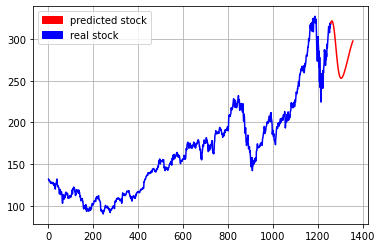

In [34]:
plt.plot(prev_day,sc.inverse_transform(data),color='blue')
plt.plot(pred_day,prediction,color='red')
blue_pach=npatches.Patch(color='blue',label="real stock")
red_patch=npatches.Patch(color='red',label="predicted stock")
plt.grid(True)
plt.legend(handles=[red_patch,blue_pach])
plt.show()